# pyIsoDep

Copyright (c) Dan Kotlyar

# Full Depletion Case

##  Description

Example on how to execute a full depletion calculations.

## Load modules

In [1]:
import numpy as np
from pyIsoDep.functions.maindepletionsolver import MainDepletion
from pyIsoDep.functions.generatedata import TransmutationData
from pyIsoDep.functions.postprocessresults import Results

### Cross sections pre-generated in advance

In [2]:
from pyIsoDep.tests.pregenerated_xs import ID, N0, sig_c,\
    sig_c2m, sig_n2n, sig_n3n, sig_f

### Data Generation Stage

In [3]:
# Reset the data container
data = TransmutationData(libraryFlag=True, wgtFY=1.0)
# Feed cross sections into the container
data.ReadData(ID, sig_f=sig_f, sig_c=sig_c, sig_c2m=sig_c2m,
              sig_n2n=sig_n2n, sig_n3n=sig_n3n, flagBarns=False)

### Depletion Stage

#### Define metadata

In [4]:
nsteps = 10
timeDays = 25*np.ones(nsteps)
power = 348E+6*np.ones(nsteps)
volume = 332097.750  # volume in cm**3

#### Execute Depletion

In [5]:
dep = MainDepletion(0.0, data)
# define metadata (steps, flux, and so on)
dep.SetDepScenario(power=power, timeUnits="days", timesteps=timeDays)
# set initial composition
dep.SetInitialComposition(ID, N0, vol=volume)
# solve the Bateman equations
dep.SolveDepletion(method="cram")

#### Post depletion analysis

In [6]:
dep.DecayHeat()
dep.Radiotoxicity()
dep.Activity()
dep.Mass()

### Post-process results

In [7]:
res = Results(dep)

In [8]:
res.getvalues("totalQt")

array([ 7248640.09481547, 22638779.94133376, 22235106.01421065,
       21792547.34578193, 21511141.4579002 , 21321796.30272089,
       21187330.96762067, 21088244.91790495, 21013933.42155456,
       20958439.33394426, 20918279.14974557])

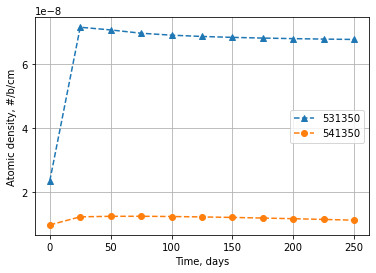

In [9]:
res.plot("Nt", timeUnits="days", markers=['--^', '--o'], isotopes=[531350, 541350],
         ylabel="Atomic density, #/b/cm")

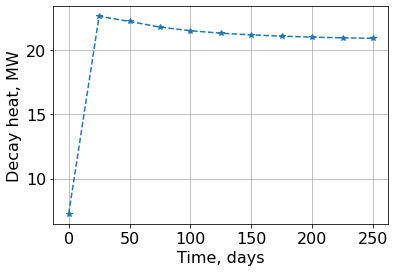

In [10]:
res.plot("totalQt", timeUnits="days", norm=1E+6, ylabel="Decay heat, MW")

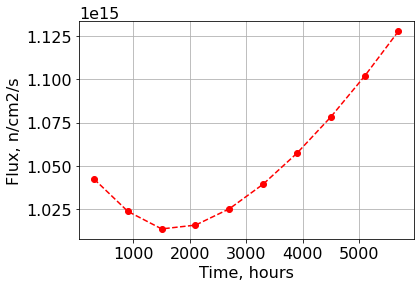

In [11]:
res.plot("flux", timeUnits="hours", markers="--ro", ylabel="Flux, n/cm2/s")